In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,695 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

# model setting and custom data training

사용한 모델 : https://github.com/ultralytics/yolov3

In [3]:
%cd drive/My Drive

/content/drive/My Drive


In [ ]:
# !git clone https://github.com/ultralytics/yolov3.git

Cloning into 'yolov3'...
remote: Enumerating objects: 9413, done.
remote: Total 9413 (delta 0), reused 0 (delta 0), pack-reused 9413
Receiving objects: 100% (9413/9413), 7.80 MiB | 7.08 MiB/s, done.
Resolving deltas: 100% (6458/6458), done.


In [4]:
%cd yolov3

/content/drive/My Drive/yolov3


# setting

- data > custom > images : 이미지 저장
- data > custom > labels : label txt파일 저장
- cfg > cfg파일 filter, class 수정
- !wget https://pjreddie.com/media/files/darknet53.conv.74 로 모델 다운받기(cfg나 weights 폴더 안에)
- data > custom > classes.names : class 이름 파일
- data > custom > train, valid.txt : train, valid 사진 경로
- data > custom.data  : train.txt, valid.txt, class.names 파일 경로
- data > samples : test 이미지 저장

# Training
- 처음에 darknet53.conv.74로 학습을 시작하고 이후로 best.pt나 last.pt로 학습 진행

In [ ]:
# !python3 train.py --cfg cfg/yolov3-spp3.cfg --data data/custom.data --weights cfg/darknet53.conv.74 --batch-size 4
!python3 train.py --cfg cfg/yolov3-spp3.cfg --data data/custom.data --weights weights/last.pt --batch-size 4

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(adam=False, batch_size=4, bucket='', cache_images=False, cfg='cfg/yolov3-spp3.cfg', data='data/custom.data', device='', epochs=300, evolve=False, freeze_layers=False, img_size=[320, 640], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
2020-08-13 07:17:25.369151: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Model Summary: 225 layers, 6.38621e+07 parameters, 6.38621e+07 gradients
Optimizer groups: 76 .bias, 76 Conv2d.weight, 73 other
Caching labels data/custom/train.txt (41 found, 0 missing, 0 empty, 0 duplicate, for 41 images): 100% 41/41 [00:00<00:00, 511.82it/s]
Caching labels da

# 성능 향상 보기

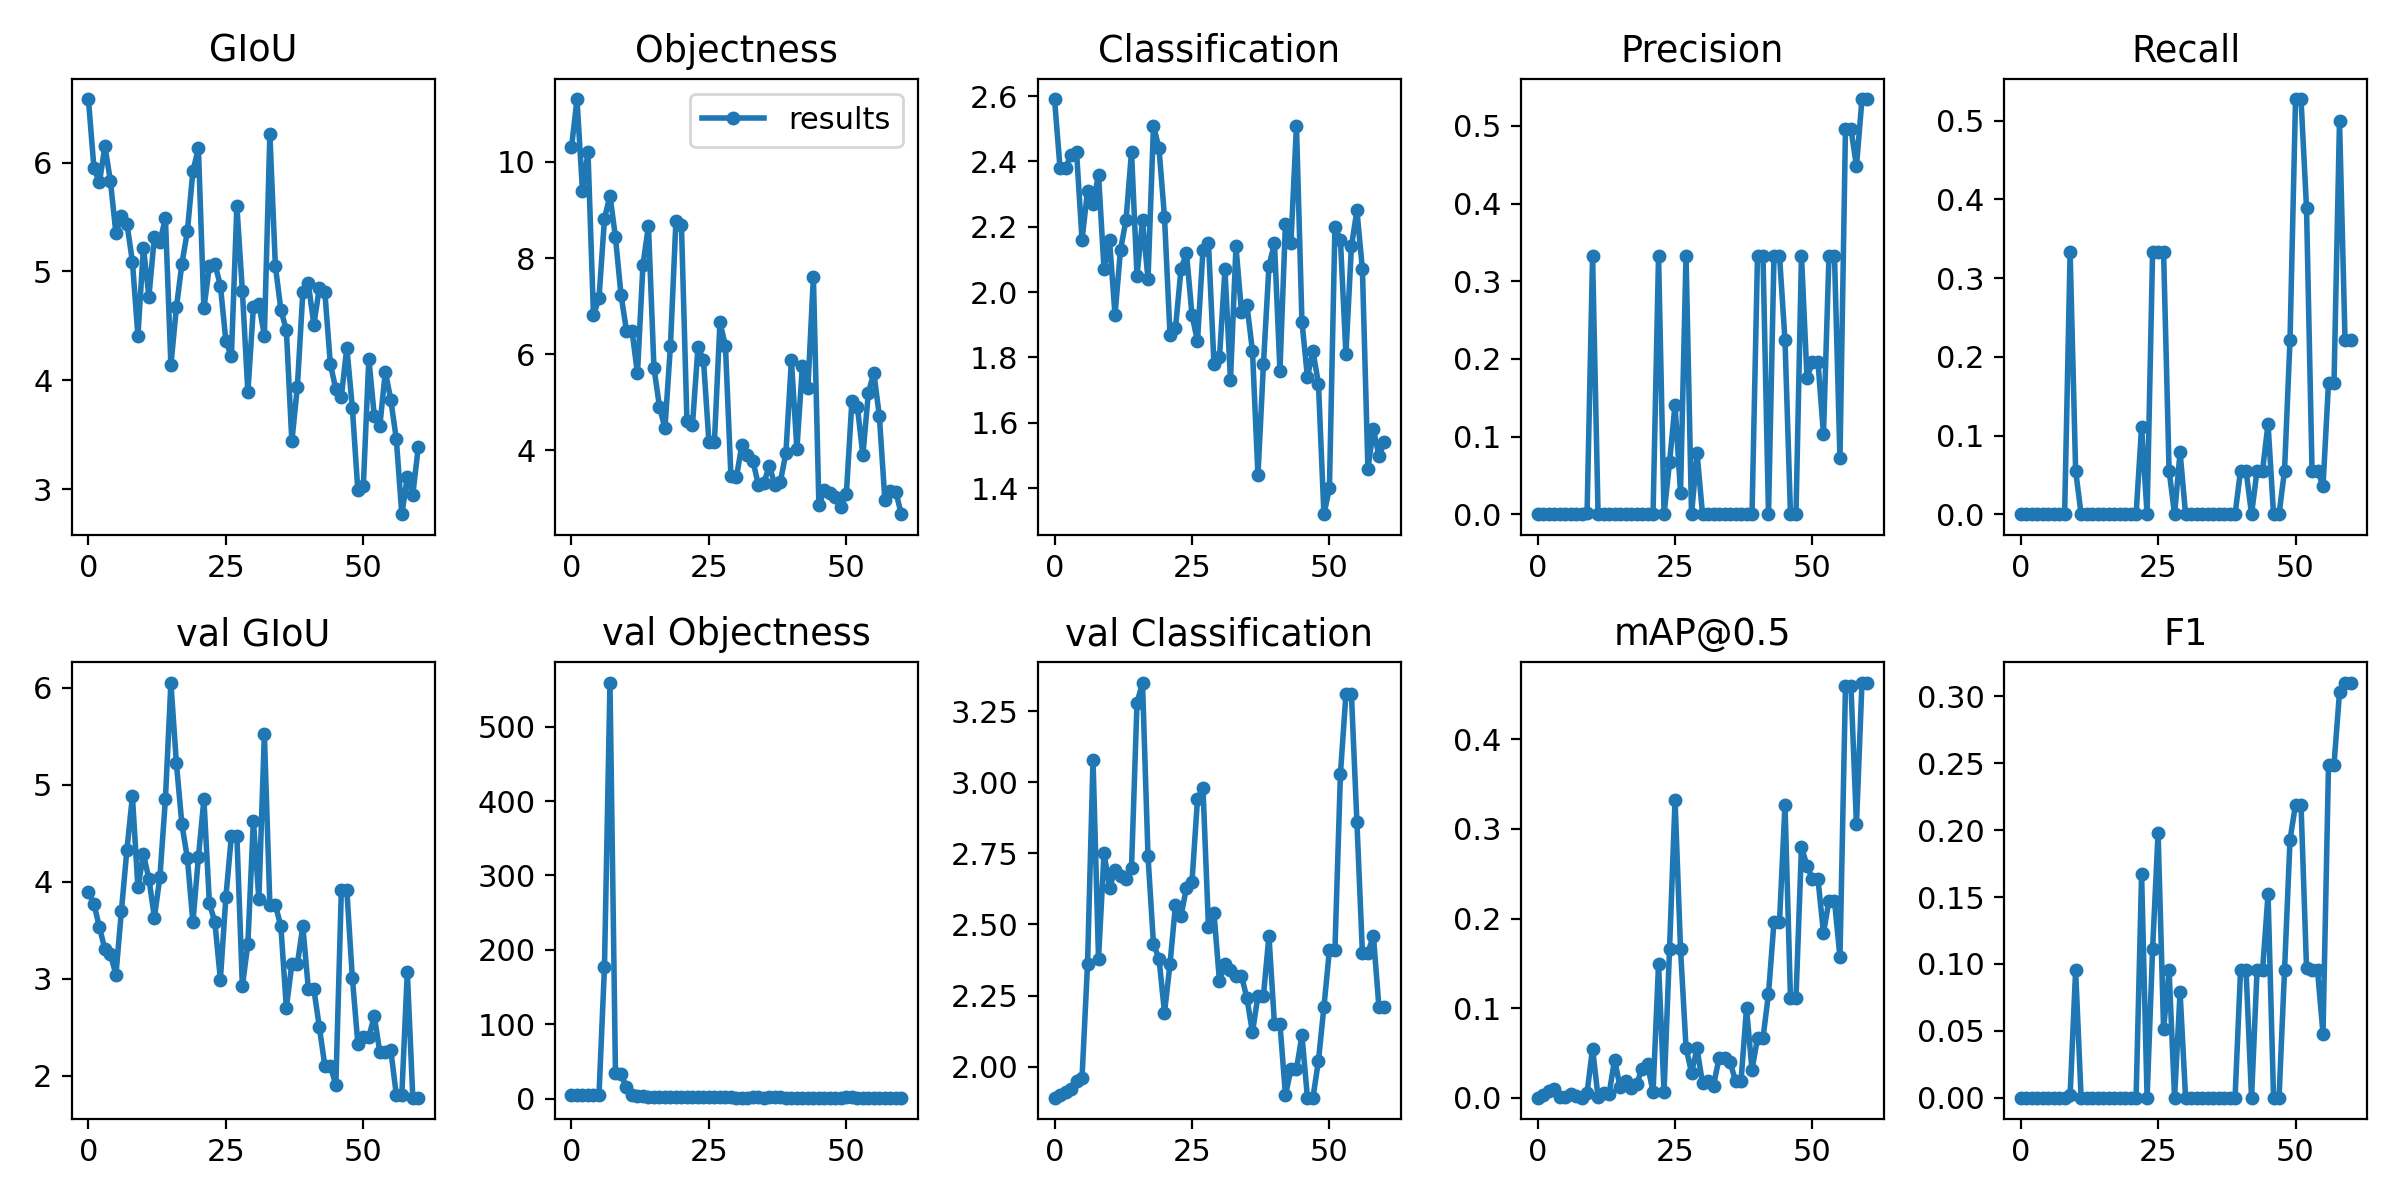

In [ ]:
from PIL import Image
!python3 -c "from utils import utils; utils.plot_results()"  # plot training results
Image.open('results.png')

# predict



In [5]:
!python3 detect.py --cfg cfg/yolov3-spp3.cfg --names data/custom/classes.names --weights weights/last.pt --source data/samples/딸기_16.jpg

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-spp3.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/custom/classes.names', output='output', save_txt=False, source='data/samples/딸기_16.jpg', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.38621e+07 parameters, 6.38621e+07 gradients
image 1/1 data/samples/딸기_16.jpg: 384x512 14 딸기s, Done. (0.040s)
Results saved to /content/drive/My Drive/yolov3/output
Done. (0.759s)


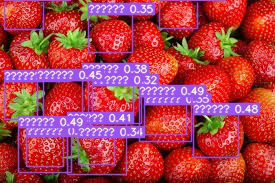

In [7]:
from PIL import Image
Image.open('output/딸기_16.jpg')

In [8]:
import sys
sys.stdin.encoding

'UTF-8'